#### Data Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [3]:
def state_calc(vdwaals):
    
    k,T=1,1
    vdwaals = convert(vdwaals)
    # vdwaals = vdwaals

    partition_func = 0
    for e in vdwaals:
        partition_func += np.exp(-e/(k*T))

    state_prob = []
    for e in vdwaals:
        state_prob.append(np.exp(-e/(k*T))/partition_func)

    return vdwaals,state_prob

In [4]:
b1ps = pd.read_csv("example_nb_partition_function/delta_complex.csv", sep=",", header=None, skiprows=3,
               names=["Frame #", "BOND", "ANGLE", "DIHED", "UB", "IMP", "CMAP",
                      "VDWAALS", "EEL", "1-4 VDW", "1-4 EEL", "EGB", "ESURF",
                      "GGAS", "GSOLV", "TOTAL"])

spps = pd.read_csv('data/interaction_energies/spid_ps/FINAL_RESULTS_MMPBSA.csv',skiprows=374)
b1b1 = pd.read_csv('data/interaction_energies/b1_b1/FINAL_RESULTS_MMPBSA.csv',skiprows=2114)
b1sp = pd.read_csv('data/interaction_energies/b1_spid/FINAL_RESULTS_MMPBSA.csv',skiprows=2087)

# spsp
# psps

cbm = pd.read_csv('data/interaction_energies/bacbm2_ps/FINAL_RESULTS_MMPBSA.csv',skiprows=2114)


#### BARBIE1 PS

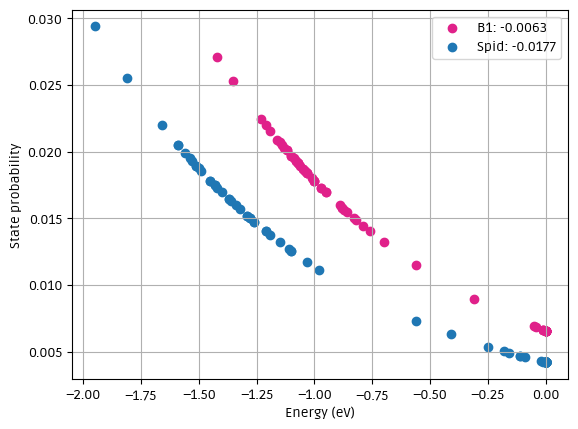

In [64]:
b1_vdwaals,b1_state_prob = state_calc(df['VDWAALS'])
spid_vdwaals,spid_state_prob = state_calc(df1['VDWAALS'])


plt.scatter(b1_vdwaals,b1_state_prob,color='#E0218A',label=f'B1: {round(np.trapz(b1_vdwaals,b1_state_prob),4)}')
plt.scatter(spid_vdwaals,spid_state_prob,label=f'Spid: {round(np.trapz(spid_vdwaals,spid_state_prob),4)}')

plt.xlabel('Energy (eV)'),plt.ylabel('State probability')
plt.legend(),plt.grid()

plt.show()

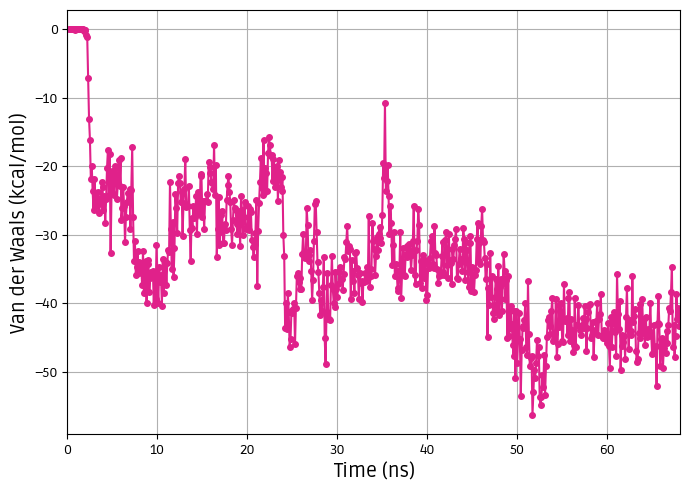

In [8]:
plt.figure(figsize=(7,5))

plt.plot(b1ps['Frame #']/10,b1ps['VDWAALS'],marker='o',markersize=4,color='#E0218A')
plt.xlabel('Time (ns)',fontsize=14),plt.ylabel('Van der Waals (kcal/mol)',fontsize=14)

# mean = np.mean(df['VDWAALS'])
x,y = b1ps['Frame #'],b1ps['VDWAALS']

plt.xlim(0,max(b1ps['Frame #'])/10)

# plt.axhline(y=mean,linestyle='--',color='gray',label=f'Average={round(mean,2)}')

# plt.legend(fontsize=12,loc='lower left')
plt.grid(),plt.tight_layout()

plt.savefig('results/b1_energy.png',dpi=700,transparent=True)

plt.show()

#### Spid PS

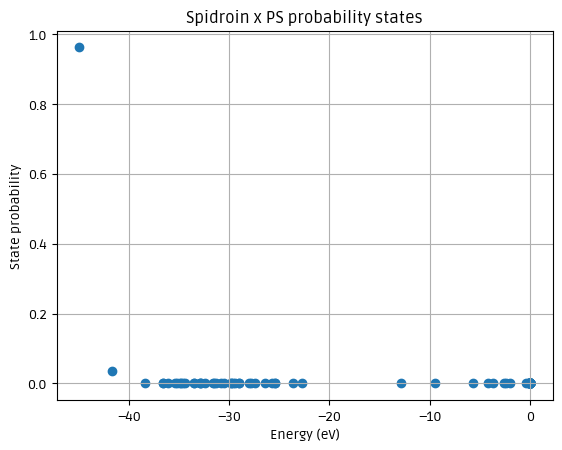

In [43]:
# k=1.380649e-23
# T=300

k=1
T=1

# spid_vdwaals = convert(df1['VDWAALS'])
spid_vdwaals = df1['VDWAALS']

partition_func = 0
for e in spid_vdwaals:
    partition_func += np.exp(-e/(k*T))

state_prob_spid = []
for e in spid_vdwaals:
    state_prob_spid.append(np.exp(-e/(k*T))/partition_func)

plt.scatter(spid_vdwaals,state_prob_spid)

# x,y = df['VDWAALS'],state_prob
# for i in range(len(x)-1):
    # plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]], color='skyblue', alpha=0.5)

# plt.xlabel('Energy (kcal/mol)')
plt.title('Spidroin x PS probability states'),plt.xlabel('Energy (eV)'),plt.ylabel('State probability')
plt.grid()

plt.show()

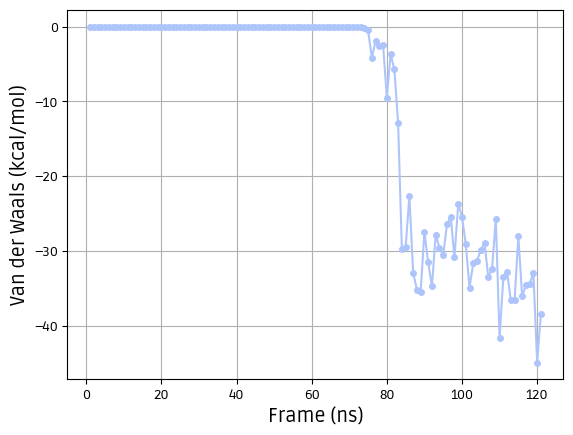

In [68]:
plt.plot(df1['Frame #'].iloc[:],df1['VDWAALS'].iloc[:],color='#AEC5FB',marker='o',markersize=4)
plt.xlabel('Frame (ns)',fontsize=14),plt.ylabel('Van der Waals (kcal/mol)',fontsize=14)

mean1 = np.mean(df1['VDWAALS'][:100])

x,y = df1['Frame #'].iloc[:70],df1['VDWAALS'].iloc[:70]

for i in range(len(x)-1):
    if i == len(x)-2:
        plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]], color='skyblue', alpha=0.5,label='Simpson')
    else:
        plt.fill_between([x[i], x[i+1]], [y[i], y[i+1]], color='skyblue', alpha=0.5)

# plt.xlim(0,70)

# plt.axhline(y=mean1,linestyle='--',color='gray',label=f'Average={round(mean1,2)}')

plt.grid()
# plt.legend(fontsize=12),plt.grid(),plt.tight_layout()
# plt.savefig('results/spid_energy.png',dpi=500)
plt.show()

#### Energy Conversion

In [5]:
def convert(df):

    k = 1.987204259e-3 #kcal/mol/K
    T = 303.15      # K

    kT = k * T   # kJ/mol
    boltz_column = ['boltz_vdw', df.iloc[:,7]] 

    min_vdw = min(boltz_column[1])
    new_df = df[['Frame #', 'VDWAALS']].copy()

    new_df['boltz_vdw'] = np.exp(-1 * (boltz_column[1] - min_vdw) / kT) #boltz_column[1]
    
    # Partition Function
    z = new_df['boltz_vdw'].sum()
    new_df['prob'] = new_df['boltz_vdw'] / z

    check = new_df['prob'].sum()

    new_df['weigthed_vdw'] = ( new_df['VDWAALS'] * new_df['prob'] )

    e_avg = new_df['weigthed_vdw'].sum()

    eVmol = e_avg*6.242e21
    eV = eVmol/6.02214076e23
    
    return new_df,round(eV,4)

In [6]:
b1ps,ev_b1 = convert(b1ps)
print('BARBIE1-PS:',ev_b1,'eV')

BARBIE1-PS: -0.5816 eV


In [7]:
cbmps,ev_cbm = convert(cbm)
print('BaCBM2-PS:',ev_cbm,'eV')

BaCBM2-PS: -0.4421 eV


In [11]:
list(cbmps['prob']).index(max(cbmps['prob']))

348

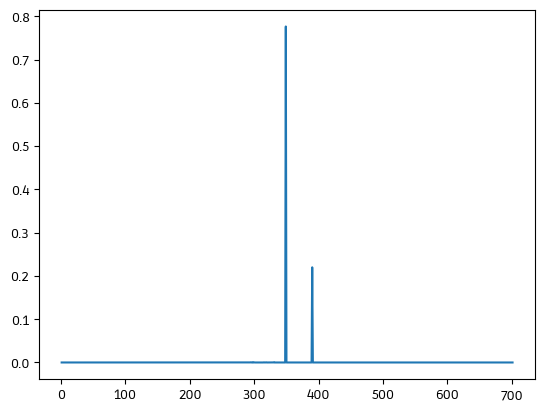

In [9]:
plt.plot(cbmps['Frame #'],cbmps['prob'])

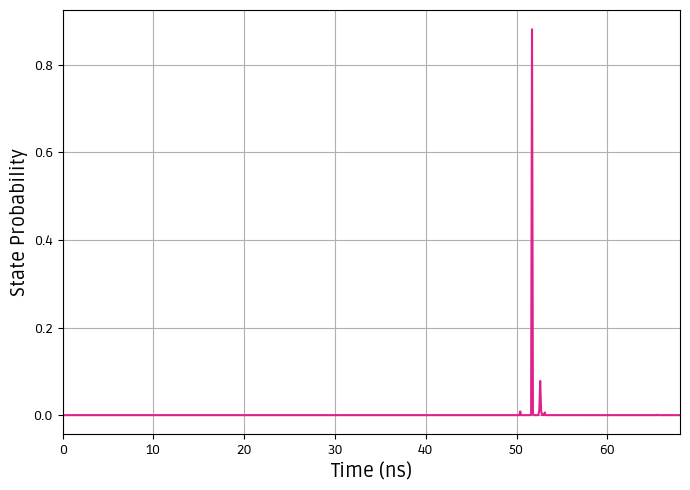

In [7]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,7))

# plt.subplot(121)

plt.plot(b1ps['Frame #']/10,b1ps['prob'],color='#E0218A')
plt.xlim(0,68)
plt.xlabel('Time (ns)',fontsize=14),plt.ylabel('State Probability',fontsize=14)
plt.grid()

# plt.subplot(122)

# plt.plot(b1ps['Frame #']/10,b1ps['weigthed_vdw'],color='#E0218A')
# plt.xlim(0,68)
# plt.xlabel('Frame (ns)',fontsize=14),plt.ylabel('Weighted van der Waals (kcal/mol)',fontsize=14)
# plt.grid()
# plt.tight_layout(pad=10)
plt.tight_layout()

plt.savefig('results/b1_ps_weighted.png',dpi=700,transparent=True)

plt.show()

In [8]:
spps,ev_spid = convert(spps)
print('Spid-PS:',ev_spid,'eV')

Spid-PS: -0.4656 eV


In [21]:
list(spps['weigthed_vdw'])[121-2]

-44.73580397987099

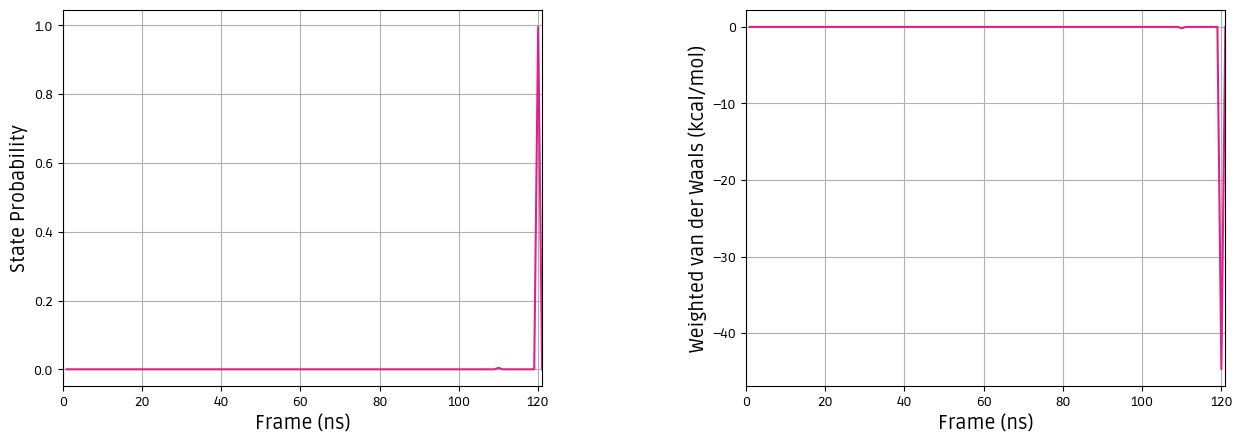

In [14]:
plt.figure(figsize=(15,7))

plt.subplot(121)

plt.plot(spps['Frame #'],spps['prob'],color='#E0218A')
plt.xlim(0,121)
plt.xlabel('Frame (ns)',fontsize=14),plt.ylabel('State Probability',fontsize=14)
plt.grid()

plt.subplot(122)

plt.plot(spps['Frame #'],spps['weigthed_vdw'],color='#E0218A')
plt.xlim(0,121)
plt.xlabel('Frame (ns)',fontsize=14),plt.ylabel('Weighted van der Waals (kcal/mol)',fontsize=14)
plt.grid(),plt.tight_layout(pad=10)

# plt.savefig('results/b1.png',dpi=700,transparent=True)

plt.show()

In [75]:
b1b1,ev_b1b1 = convert(b1b1)
print('B1-B1:',ev_b1b1,'eV')

B1-B1: -0.7061 eV


In [79]:
b1sp,ev_b1sp = convert(b1sp)
print('B1-Spid:',ev_b1sp,'eV')

B1-Spid: -0.0028 eV
